In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [58]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [59]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [60]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [61]:
df_fake["class"]= 0
df_true["class"]= 1

In [62]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470, -1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)  
for i in range(21416,21406, -1):
    df_true.drop([i], axis=0, inplace=True)

In [63]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [64]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [65]:
df = df_marge.drop(["title", "subject", "date"], axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [66]:
#Shuffle The Dataset (True and Fake)
df = df.sample(frac=1)

In [67]:
df.head(10)

,text,class
13153,Censorship is alive and well in Obama s Americ...,0
15968,ANKARA (Reuters) - Turkey cannot accept the Sy...,1
7600,(Reuters) - Disgraced former U.S. Representati...,1
6598,LOS ANGELES (Reuters) - A federal judge declar...,1
896,Get ready for Donald Trump to throw the worst ...,0
22800,21st Century Wire says Some devastating news b...,0
22556,21st Century Wire says What is wrong with Chri...,0
14092,NEW DELHI (Reuters) - India has approved a thr...,1
15786,,0
4355,One of the most insane things about Republican...,0


In [68]:
#Check if any null value is there in dataframe.
df.isnull().sum()

text     0
class    0
dtype: int64

In [69]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','', text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'', text)
    text = re.sub('\n','', text)
    text = re.sub('\w*\d\w*','', text)
    return text

In [70]:
df["text"] = df["text"].apply(word_drop)

In [71]:
df.head(10)

,text,class
13153,censorship is alive and well in obama s americ...,0
15968,ankara reuters turkey cannot accept the sy...,1
7600,reuters disgraced former u s representati...,1
6598,los angeles reuters a federal judge declar...,1
896,get ready for donald trump to throw the worst ...,0
22800,century wire says some devastating news befel...,0
22556,century wire says what is wrong with chris ma...,0
14092,new delhi reuters india has approved a thr...,1
15786,,0
4355,one of the most insane things about republican...,0


In [72]:
#Now we will define dependent and independent variable as x and y
x = df["text"]
y = df["class"]

class
0    23471
1    21407
Name: text, dtype: int64


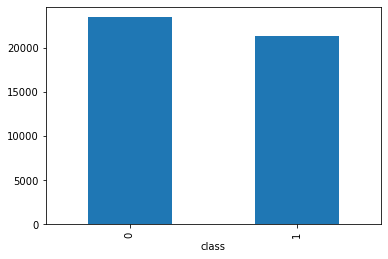

In [73]:
# How many fake and real articles?
print(df.groupby(['class'])['text'].count())
df.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

In [74]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
#Spliting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [76]:
#vectorize the x variable because for calculation we cant use raw text.
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [80]:
LR.score(xv_test, y_test)

0.9857397504456328

In [81]:
pred_LR = LR.predict(xv_test)

In [82]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5890
           1       0.98      0.99      0.99      5330

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion matrix, without normalization


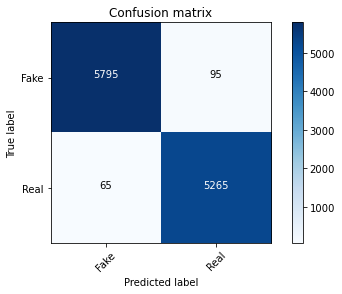

In [83]:
cm = metrics.confusion_matrix(y_test, pred_LR)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [86]:
DT.score(xv_test, y_test)

0.9950980392156863

In [87]:
pred_DT = DT.predict(xv_test)

In [88]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5890
           1       0.99      0.99      0.99      5330

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Confusion matrix, without normalization


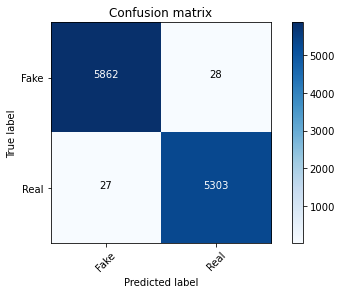

In [89]:
cm = metrics.confusion_matrix(y_test, pred_DT)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
RFC = RandomForestClassifier()
RFC.fit(xv_train, y_train)

RandomForestClassifier()

In [92]:
RFC.score(xv_test, y_test)

0.9901069518716578

In [93]:
pred_RFC= RFC.predict(xv_test)

In [94]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5890
           1       0.99      0.99      0.99      5330

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion matrix, without normalization


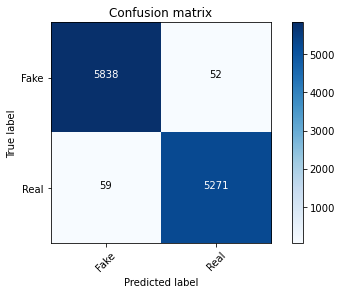

In [95]:
cm = metrics.confusion_matrix(y_test, pred_RFC)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [96]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [97]:
news = str(input())
manual_testing(news)

GENEVA (Reuters) - North Korea and the United States clashed at a U.N. forum on Tuesday over their military intentions towards one another, with Pyongyang s envoy declaring it would  never  put its nuclear deterrent on the negotiating table. Japan, well within reach of North Korea s missiles, said the world must maintain pressure on the reclusive country to rein in its nuclear and missile programs and now was not the time for a resumption of multi-party talks. North Korea has pursued its weapons programs in defiance of U.N. Security Council sanctions and ignored all calls, including from major ally China, to stop, prompting a bellicose exchange of rhetoric between the North and the United States. North Korea justifies its weapons programs, including its recent threat to fire missiles towards the U.S. Pacific territory of Guam, by pointing to perceived U.S. hostility, such as military exercises with South Korea this week. U.S. disarmament ambassador Robert Wood told a U.N.-sponsored Con